In [1]:
#乱数生成
import random

x=[random.uniform(-15, 15) for i in range(100)]
y=[random.uniform(1, 3) for i in range(50)]
y[len(y):len(y)]=[random.uniform(-1, -3) for i in range(50)]
z=[random.uniform(-15, 15) for i in range(100)]

#ラベル生成
import numpy as np

label=[np.zeros(50)]
label=np.append(label,np.ones(50))

<IPython.core.display.Javascript object>


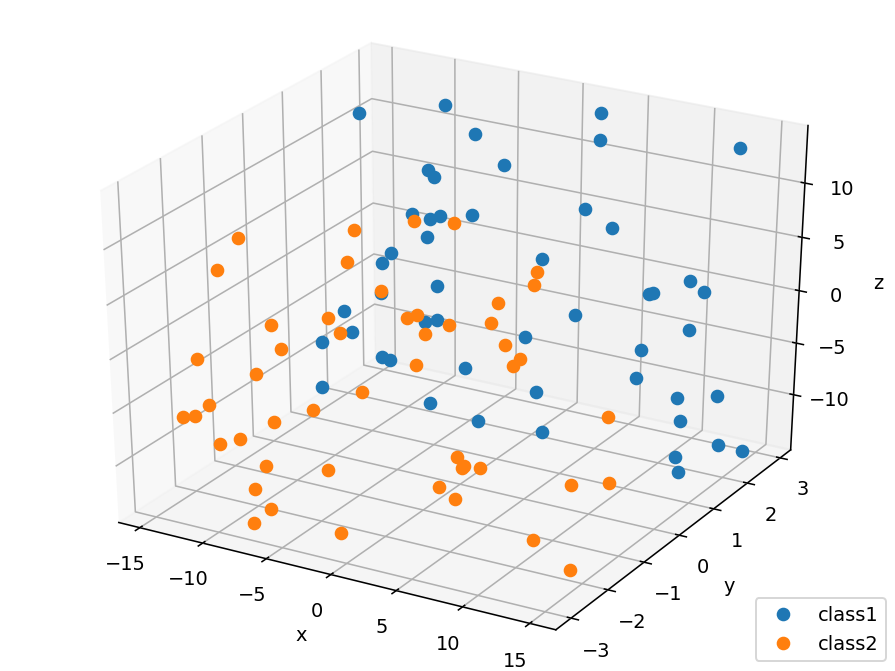

In [2]:
#人口データの描画
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot(x[0:50], y[0:50], z[0:50],marker="o",linestyle='None', label='class1')
ax.plot(x[50:], y[50:], z[50:],marker="o",linestyle='None',label='class2')
plt.legend(loc='lower right')
plt.show()

In [3]:
#PCA実行
from sklearn.decomposition import PCA

df=np.array([x,y,z]).T
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

<IPython.core.display.Javascript object>


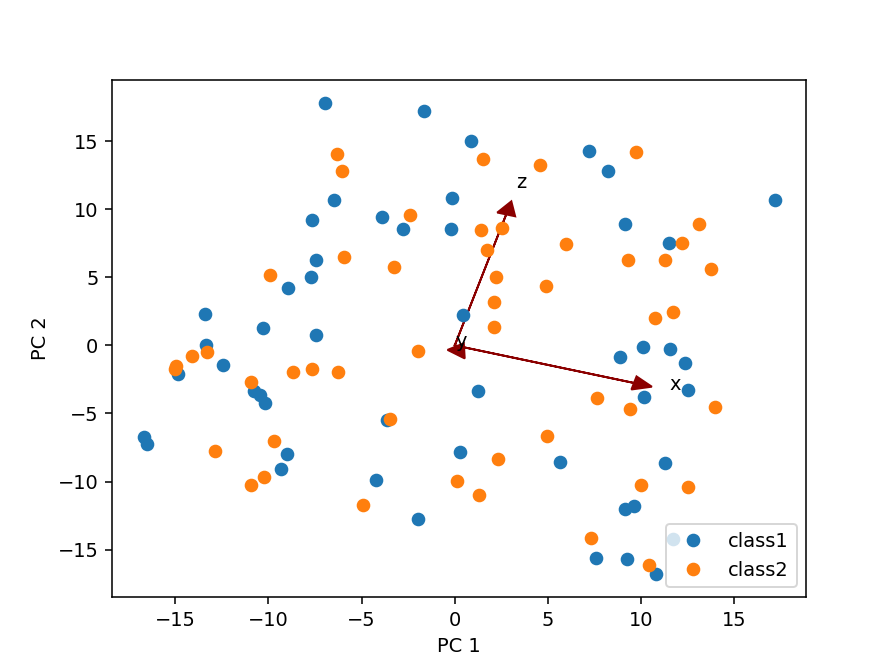

In [4]:
#PCAにより生成された特徴空間にサンプルを描画
feature_names=['x','y','z']
plt.figure()
plt.plot(df_pca[:50, 0], df_pca[:50, 1], marker="o", linestyle='None', label='class1')
plt.plot(df_pca[50:, 0], df_pca[50:, 1], marker="o", linestyle='None', label='class2')
pc1 = pca.components_[0]
pc2 = pca.components_[1]
for i in range(len(feature_names)):
    plt.arrow(0, 0, pc1[i]*10, pc2[i]*10, head_width=1, head_length=1, color='darkred')
    plt.text(pc1[i] * 12, pc2[i] * 12, feature_names[i])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.show()

In [6]:
#LDA実行
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
df_lda = lda.fit_transform(df, label)

<IPython.core.display.Javascript object>


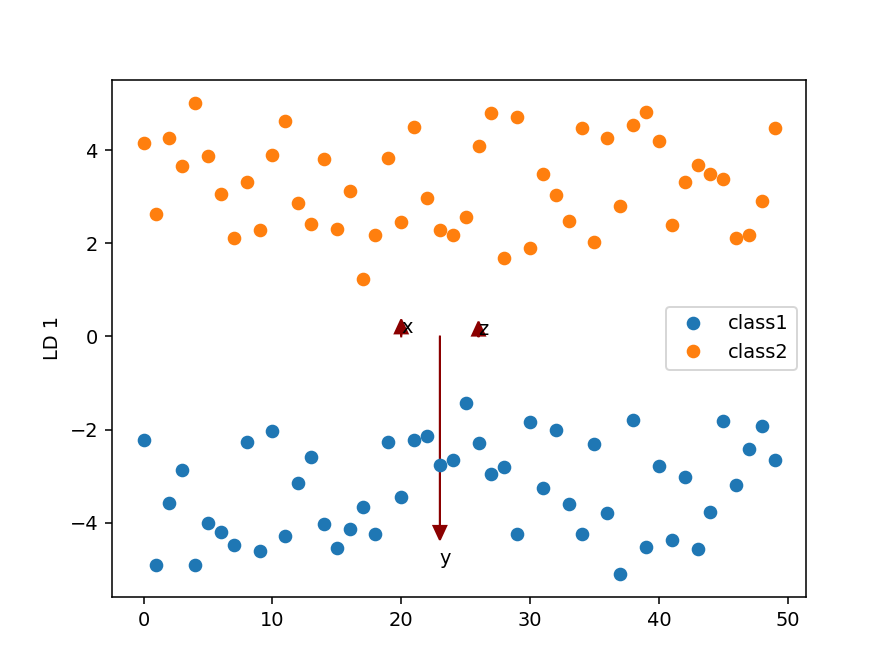

In [7]:
#LDAにより生成された特徴空間にサンプルを描画
plt.figure()
plt.plot(df_lda[:50], marker="o", linestyle='None', label='class1')
plt.plot(df_lda[50:], marker="o", linestyle='None', label='class2')
ld=lda.scalings_.T
for i in range(len(feature_names)):
    plt.arrow(20+i*3, 0, 0, ld[0,i]*2.5, head_width=1, head_length=0.3, color='darkred')
    plt.text(20 + i * 3, lda.scalings_[i] * 3, feature_names[i])
plt.ylabel('LD 1')
plt.legend(loc='center right')
plt.show()

In [86]:
pc1

array([-0.82481942, -0.02142489, -0.56499017])

In [8]:
pc2

array([-0.2758542 , -0.00877993,  0.96115939])

In [62]:
np.array(lda.scalings_)

array([[ 0.00200112],
       [-1.8188839 ],
       [-0.00778251]])

In [69]:
ld[0,1]

-1.8188838950240684